In [440]:
from colored_networks.colored_network import ColoredNetwork, DeleteRule, SplitRule, Edge, Node

In [441]:
n_nodes = 6
example_graph = [(0,1), (0,2), (1,3), (1,4), (2,4), (3,4), (3,5)]
start = 0
end = 3

node_degrees = [max(2, len([edge for edge in example_graph if node in edge])) for node in range(n_nodes)]
node_degrees[start] += 1
node_degrees[end] += 1
ring_nodes = [[Node(id=n_nodes*d+node) for d in range(2*degree)] for node, degree in zip(range(n_nodes), node_degrees)]

colored_edges = []
for node in range(n_nodes):
    for i in range(2*node_degrees[node]):
        colored_edges.append(Edge(
            ring_nodes[node][i],
            ring_nodes[node][(i+1)%(2*node_degrees[node])],
            color="black"
        ))

nodes = [node for ring in ring_nodes for node in ring]

unused_idx = 2 * n_nodes * n_nodes
cur_idx = [0] * n_nodes
for (u, v) in example_graph:
    edge_connector = Node(id=unused_idx)
    nodes.append(edge_connector)
    unused_idx += 1
    colored_edges.append(Edge(
        ring_nodes[u][cur_idx[u]],
        edge_connector,
        color="green"
    ))
    colored_edges.append(Edge(
        edge_connector,
        ring_nodes[v][cur_idx[v]],
        color="green"
    ))
    cur_idx[u] += 2
    cur_idx[v] += 2

start_marker = Node(id=-1)
end_marker = Node(id=-2)
nodes.append(start_marker)
nodes.append(end_marker)

colored_edges.append(Edge(
    start_marker,
    ring_nodes[start][cur_idx[start]],
    color="red"
))
colored_edges.append(Edge(
    ring_nodes[end][cur_idx[end]],
    end_marker,
    color="blue"
))


In [442]:
rules = [
    SplitRule(
        name="Start update",
        input={"red": 1, "black": 2},
        node1_connection={"red": "pink", "black": "yellow"},
        node2_connection={"red": "blue"},
    ),
    SplitRule(
        name="Start update (2)",
        input={"magenta": 1, "black": 2},
        node1_connection={"magenta": "pink", "black": "yellow"},
        node2_connection={},
    ),
    SplitRule(
        name="Propagate update",
        input={"yellow": 1, "black": 1},
        node1_connection={"yellow": "yellow", "black": "orange"},
        node2_connection={},
    ),
    SplitRule(
        name="Propagate update (new edge)",
        input={"yellow": 1, "green": 1},
        node1_connection={"yellow": "yellow", "green": "orange"},
        node2_connection={},
    ),
    DeleteRule(
        name="Propagate update (node already reachable)",
        input={"yellow": 1, "lime": 1},
        rewiring={},
    ),
    SplitRule(
        name="Colliding updated",
        input={"yellow": 2},
        node1_connection={"yellow": "black"},
        node2_connection={},
    ),
    SplitRule(
        name="Update next nodes",
        input={"orange": 1, "black": 2},
        node1_connection={"orange": "purple", "black": "yellow"},
        node2_connection={},
    ),
    SplitRule(
        name="Update next nodes (2)",
        input={"orange": 1, "black": 1, "lime": 1},
        node1_connection={"orange": "purple", "black": "yellow", "lime": "yellow"},
        node2_connection={},
    ),
    SplitRule(
        name="Update next nodes (3)",
        input={"orange": 2, "black": 1},
        node1_connection={"orange": "purple", "black": "yellow"},
        node2_connection={},
    ),
    SplitRule(
        name="Update next nodes (4)",
        input={"orange": 2, "lime": 1},
        node1_connection={"orange": "purple", "lime": "yellow"},
        node2_connection={},
    ),
    SplitRule(
        name="Update next nodes (5)",
        input={"orange": 3},
        node1_connection={"orange": "olive"},
        node2_connection={},
    ),
    SplitRule(
        name="Update next nodes (6)",
        input={"orange": 1, "black": 1},
        node1_connection={"orange": "purple", "black": "yellow"},
        node2_connection={},
    ),
    SplitRule(
        name="Update next nodes (7)",
        input={"orange": 2},
        node1_connection={"orange": "olive"},
        node2_connection={},
    ),
    SplitRule(
        name="Expand reach",
        input={"orange": 1, "green": 1, "black": 1},
        node1_connection={"orange": "purple", "green": "lime", "black": "yellow"},
        node2_connection={},
    ),
    SplitRule(
        name="Expand reach",
        input={"orange": 2, "green": 1},
        node1_connection={"orange": "olive", "green": "lime"},
        node2_connection={},
    ),
    SplitRule(
        name="Done updating (1)",
        input={"black": 2, "purple": 1},
        node1_connection={"black": "black", "purple": "olive"},
        node2_connection={},
    ),
    SplitRule(
        name="Done updating (2)",
        input={"black": 1, "purple": 1},
        node1_connection={"black": "black", "purple": "olive"},
        node2_connection={},
    ),
    SplitRule(
        name="Done updating (3)",
        input={"black": 1, "purple": 2},
        node1_connection={"black": "black", "purple": "olive"},
        node2_connection={},
    ),
    SplitRule(
        name="Done updating (4)",
        input={"black": 1, "purple": 1, "lime": 1},
        node1_connection={"black": "black", "purple": "olive", "lime": "lime"},
        node2_connection={},
    ),
    SplitRule(
        name="Backtrace edge",
        input={"yellow": 1, "olive": 1},
        node1_connection={"yellow": "black", "olive": "black"},
        node2_connection={},
    ),
    SplitRule(
        name="Next round (1)",
        input={"pink": 1, "black": 2},
        node1_connection={"pink": "teal", "black": "black"},
        node2_connection={"pink": "red"},
    ),
    SplitRule(
        name="Next round (2)",
        input={"teal": 1, "black": 2},
        node1_connection={"teal": "brown", "black": "black"},
        node2_connection={"teal": "cyan"},
    ),
    DeleteRule(
        name="Next round (3)",
        input={"brown": 1, "red": 1, "cyan": 1, "blue": 1},
        rewiring={("blue", "cyan"): "blue", ("cyan", "red"): "blue", ("red", "brown"): "magenta"},
    ),
    SplitRule(
        name="Discover goal (1)",
        input={"orange": 1, "black": 1, "blue": 1},
        node1_connection={"orange": "gray", "black": "gray", "blue": "crimson"},
        node2_connection={},
    ),
    SplitRule(
        name="Discover goal (2)",
        input={"orange": 2, "blue": 1},
        node1_connection={"orange": "gray", "blue": "crimson"},
        node2_connection={},
    ),
    DeleteRule(
        name="Contract gray",
        input={"gray": 2},
        rewiring={("gray", "gray"): "gray"},
    ),
    DeleteRule(
        name="Delete gray",
        input={"gray": 1},
        rewiring={},
    ),
    DeleteRule(
        name="Contract pink",
        input={"pink": 1, "gray": 1},
        rewiring={("pink", "gray"): "pink"},
    ),
    DeleteRule(
        name="Deleted everything",
        input={"pink": 1, "crimson": 1},
        rewiring={(("pink", "crimson")): "darkblue"},
    ),
    DeleteRule(
        name="Complete calculation",
        input={"darkblue": 1, "blue": 1},
        rewiring={},
    ),
    DeleteRule(
        name="Delete signleton",
        input={},
        rewiring={},
    ),
]

delete_colors = ["yellow", "orange", "black", "purple", "green", "lime", "olive"]
for c in delete_colors:
    rules.append(SplitRule(
        name="Deletion at beginning (2)",
        input={c: 1, "gray": 1, "pink": 1},
        node1_connection={c: "gray", "gray": "gray", "pink": "pink"},
        node2_connection={},
    ))
    rules.append(DeleteRule(
        name="Delete color (1)",
        input={c: 1, "gray": 1},
        rewiring={(c, "gray"): "gray"},
    ))
    rules.append(DeleteRule(
        name="Delete color (2)",
        input={c: 1, "gray": 2},
        rewiring={(c, "gray"): "gray"},
    ))
    rules.append(DeleteRule(
        name="Delete color (3)",
        input={c: 2, "gray": 1},
        rewiring={(c, "gray"): "gray"},
    ))

for i, c1 in enumerate(delete_colors[:-1]):
    for c2 in delete_colors[i+1:]:
        rules.append(DeleteRule(
            name="Delete color (4)",
            input={c1: 1, c2: 1, "gray": 1},
            rewiring={(c1, "gray"): "gray", (c2, "gray"): "gray"},
        ))

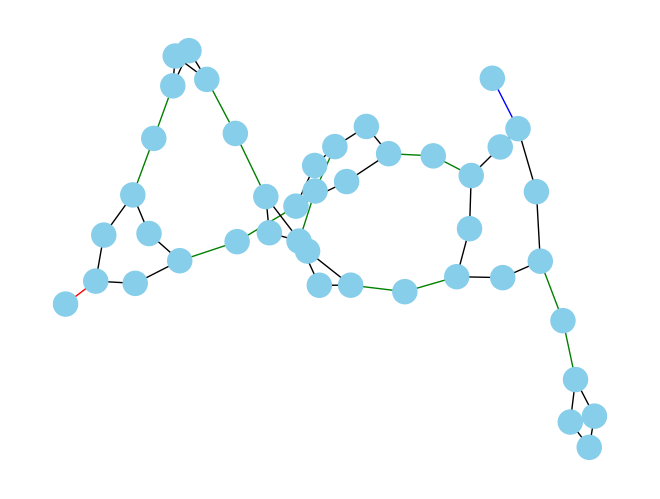

In [443]:
net = ColoredNetwork(nodes, colored_edges, rules)
net.draw()
net.reduce(verbose=False)   # Set verbose to true to see intermediate steps

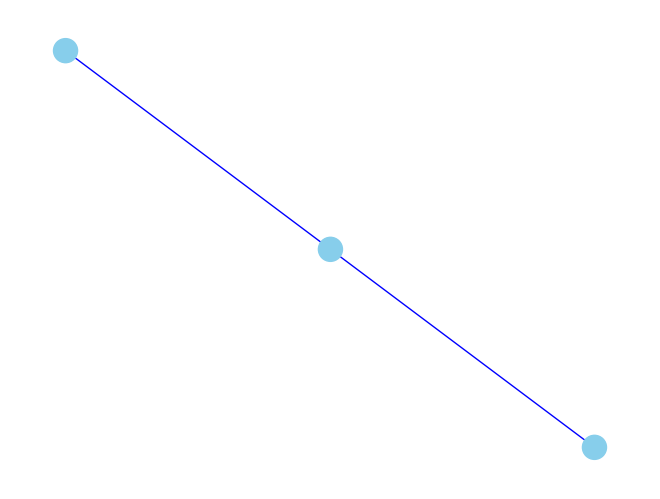

In [444]:
net.draw()